<a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/DAwPy_S5_6_%28Groupby_and_Useful_Operations%29/Advanced.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a><br/>
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/DAwPy_S5_6_%28Groupby_and_Useful_Operations%29/Advanced.ipynb)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

# Operating with pandas DataFrames

[SOURCE1](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)
[SOURCE2](https://datagy.io/python-pivot-tables/)
[SOURCE3](https://medium.com/analytics-vidhya/exploratory-data-analysis-of-titanic-survival-problem-e3af0fb1f276)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import YouTubeVideo

### Jupyter Notebooks

One of the star technologies in the Clarusway universe is Jupyter.  

Remember Julia, Python, R (Ju-Py-teR) as original early adopters of the Jupyter architecture.  

Jupyter Notebooks started in their development as Python-only I-Python Notebooks.  By dint of refactoring, the kernel could become a swappable item, i.e. swap out Python for Julia, or R.  Or Haskell.

One thing you can do with a Jupyter Notebook is embed a YouTube.  

The YouTube might be about the Notebook itself, or at least about what the Notebook is about.  On the other hand, the YouTube might be what you're citing as an object of scholarship, as something you're talking about in the Notebook, but perhaps not dwelling on.

For example, we appreciate the Jake Vanderplus corpus on Github, especially, for our purposes, the Data Science Handbook.  Here's a YouTube of his keynote address to Pycon Columbia in 2019.

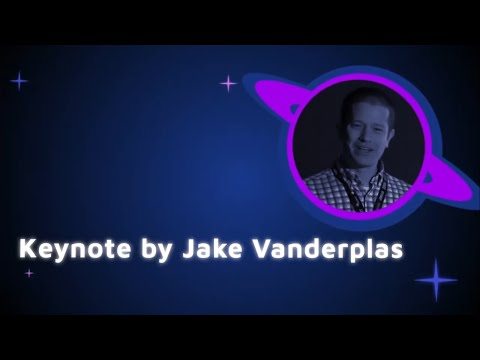

In [3]:
YouTubeVideo("zna96tsMIWE")  # https://youtu.be/zna96tsMIWE

### Planet Python

If we think of a subculture, such as Python's, as a planet or nation, then we get some useful geographic metaphors, such as "nearest neighbors".

An aspect of Planet Python is Pycon and EuroPython.  The latter came first, as Python was hatched in Europe, in the Netherlands in particular, by Guido van Rossum.  Then is spread around the world.  Pycons in the western hemisphere were started by the PSF (Python Software Foundation) as a core promotional campaign for the language.

[Flickr Slides from a Pycon in 2016, Portland, Oregon](https://flickr.com/photos/kirbyurner/albums/72157669197221096)

### Pandas

Part of Planet Python is [pandas](https://en.wikipedia.org/wiki/Pandas_(software)), a project started by [Wess McKinney](https://twitter.com/wesmckinn).  He is also the author of [Getting Started with pandas](https://wesmckinney.com/book/pandas-basics.html).

At this point in our Clarusway course, we have met numpy and the pandas DataFrame, and started looking at that object's principal methods.

### Reviewing GroupBy

The `.groupby` method of the DataFrame splits itself into an iterable sequence of [chunks](https://www.merriam-webster.com/dictionary/chunk), which then may be variously [aggregated](https://www.merriam-webster.com/dictionary/aggregated) such as by summing, averaging, counting and so on.

Note below the syntax for starting a random number generator (`rng`) at a specific place.  This object gets used to populate the column `data2`.

In [4]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [5]:
df.groupby("key").data1  # remember, a key column need not be named "key"

A single series with groupby enabled, one could put it.  There's nothing tabular worth showing at this point.

Below, in looping over the groupby, we encounter a (key: group) structure of several items.

In [6]:
for k, g in df.groupby("key"):
    print(k)  # value of "key" is the key
    print(g[['data1','data2']].agg(sum))  # aggregator attached
    print(g.shape)

A
data1    3
data2    8
dtype: int64
(2, 3)
B
data1    5
data2    7
dtype: int64
(2, 3)
C
data1     7
data2    12
dtype: int64
(2, 3)


In [7]:
bykey = df.groupby("key")  # we can save the groupby by nameing it...

In [8]:
bykey[['data1']].count()   # ... then using it.  One column selected, aggregator attached.

,data1
key,
A,2
B,2
C,2


In [9]:
df.groupby("key").agg("count") # all columns counted

,data1,data2
key,,
A,2,2
B,2,2
C,2,2


In [10]:
bykey['data1'].sum() # one colun summed, but groupwise, by key

key
A    3
B    5
C    7
Name: data1, dtype: int64

In [11]:
df.groupby('key').aggregate(['min', np.median, max])  # multiple aggregators

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [12]:
df.groupby('key').agg([np.min, np.median, np.max])  # ... aggregators might be object in np

data1             data2            
     amin median amax  amin median amax
key                                    
A       0    1.5    3     3    4.0    5
B       1    2.5    4     0    3.5    7
C       2    3.5    5     3    6.0    9

In [13]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


Jake shows us in one of his examples how a group does not have to be one of the columns but may be any Series or sequence.  Unique values become the "bucket names" (keys to groups), the chunks are what fill the buckets.  We're ready for aggregation at that point.

In [14]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()  # aggregator attached

,data1,data2
0,7,17
1,4,3
2,4,7


This example is from [The Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126/) also.  Provided the key you wish to group on is the DataFrame index, then a mapping of its values by means of a Python dict, will also serve to define an alternate set of groups with their own keys.

Here's his example:

In [15]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,19
vowel,3,8


In [16]:
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [17]:
def filter_func(x):
    return x['data2'].std() > 4  # True

df.groupby('key').std() 

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [18]:
df.groupby('key').filter(filter_func)  # for each group, run the filter function

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [19]:
df['sum_cols'] = df['data1'] + df['data2']  # remember column creation
df

,key,data1,data2,sum_cols
0,A,0,5,5
1,B,1,0,1
2,C,2,3,5
3,A,3,3,6
4,B,4,7,11
5,C,5,9,14


In [20]:
df.drop("sum_cols", axis="columns", inplace=True) # remember dropping columns

In [21]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [22]:
def func(x):
    # x is a DataFrame of group values
    x['sum_cols'] = x['data1'] + x['data2']
    return x

df = df.groupby("key").apply(func)
df

,key,data1,data2,sum_cols
0,A,0,5,5
1,B,1,0,1
2,C,2,3,5
3,A,3,3,6
4,B,4,7,11
5,C,5,9,14


In [23]:
df.groupby('key').std().filter(regex="\d$")

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [24]:
df.groupby('key').std().filter(regex="^d")

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [25]:
df

,key,data1,data2,sum_cols
0,A,0,5,5
1,B,1,0,1
2,C,2,3,5
3,A,3,3,6
4,B,4,7,11
5,C,5,9,14


In [26]:
df[['data1', 'data2']].transform(lambda x: x + 1)

,data1,data2
0,1,6
1,2,1
2,3,4
3,4,4
4,5,8
5,6,10


In [27]:
df

,key,data1,data2,sum_cols
0,A,0,5,5
1,B,1,0,1
2,C,2,3,5
3,A,3,3,6
4,B,4,7,11
5,C,5,9,14


### Reviewing Stack / Unstack

In [28]:
animals = ['Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat']
breeds = ['Lab', 'Lab', 'Pug', 'Siamese', 'Asian', 'Asian', 'Bengal']
columns = ['color', 'age', 'weight']

In [29]:
row_index = pd.MultiIndex.from_tuples(zip(animals, breeds))
row_index

MultiIndex([('Dog',     'Lab'),
            ('Dog',     'Lab'),
            ('Dog',     'Pug'),
            ('Cat', 'Siamese'),
            ('Cat',   'Asian'),
            ('Cat',   'Asian'),
            ('Cat',  'Bengal')],
           )

In [30]:
names = ['Rover', 'Fido', 'Sydney', 'Felix', 'Tabby', 'Su', 'Tyron']
colors = ['yellow', 'black', 'orange', 'yellow', 'brown', 'chocolate', 'white']
ages = [5, 6, 3, 2, 10, 11, 5]
weights = [12.3, 12.8, 11.0, 4.7, 8.1, 9.2, 5.5]
pets_df = pd.DataFrame({'name' : names,
                        'color' : colors, 
                        'age'   : ages,
                        'weight': weights},
                        index = row_index)
pets_df

name      color  age  weight
Dog Lab       Rover     yellow    5    12.3
    Lab        Fido      black    6    12.8
    Pug      Sydney     orange    3    11.0
Cat Siamese   Felix     yellow    2     4.7
    Asian     Tabby      brown   10     8.1
    Asian        Su  chocolate   11     9.2
    Bengal    Tyron      white    5     5.5

In [31]:
pets_df.index.names = ["Animal", "Breed"]

In [32]:
pets_df

name      color  age  weight
Animal Breed                                  
Dog    Lab       Rover     yellow    5    12.3
       Lab        Fido      black    6    12.8
       Pug      Sydney     orange    3    11.0
Cat    Siamese   Felix     yellow    2     4.7
       Asian     Tabby      brown   10     8.1
       Asian        Su  chocolate   11     9.2
       Bengal    Tyron      white    5     5.5

In [33]:
stacked = pets_df.stack()
pd.DataFrame(stacked)

0
Animal Breed                    
Dog    Lab     name        Rover
               color      yellow
               age             5
               weight       12.3
               name         Fido
               color       black
               age             6
               weight       12.8
       Pug     name       Sydney
               color      orange
               age             3
               weight       11.0
Cat    Siamese name        Felix
               color      yellow
               age             2
               weight        4.7
       Asian   name        Tabby
               color       brown
               age            10
               weight        8.1
               name           Su
               color   chocolate
               age            11
               weight        9.2
       Bengal  name        Tyron
               color       white
               age             5
               weight        5.5

In [34]:
pets_df2 = pd.DataFrame({'name' : names,
                        'animal': animals,
                        'breed' : breeds,
                        'color' : colors, 
                        'age'   : ages,
                        'weight': weights})
pets_df2

,name,animal,breed,color,age,weight
0,Rover,Dog,Lab,yellow,5,12.3
1,Fido,Dog,Lab,black,6,12.8
2,Sydney,Dog,Pug,orange,3,11.0
3,Felix,Cat,Siamese,yellow,2,4.7
4,Tabby,Cat,Asian,brown,10,8.1
5,Su,Cat,Asian,chocolate,11,9.2
6,Tyron,Cat,Bengal,white,5,5.5


### Pivoting

In [35]:
# ? pd.pivot

In [36]:
pets_df2.groupby('animal').agg(np.mean)

,age,weight
animal,,
Cat,7.000000,6.875000
Dog,4.666667,12.033333


The pivots below get run twice to show how `pivot_table`...

* may be obtained from `pd`, in which case the target DataFrame needs to be passed as the data argument (leftmost), or 
* `pivot_table` may be invoked as a method of the table in question, in which case it should not be passed

In [37]:
pets_df2.pivot_table(aggfunc=np.mean, index='animal')  # table known

,age,weight
animal,,
Cat,7.000000,6.875000
Dog,4.666667,12.033333


In [38]:
# pets_df2.pivot_table(data=pets_df2, aggfunc=np.mean, index='animal') Error

In [39]:
pd.pivot_table(data=pets_df2, index='animal', aggfunc=np.mean)

,age,weight
animal,,
Cat,7.000000,6.875000
Dog,4.666667,12.033333


In [40]:
pets_df2.pivot_table(aggfunc=np.mean, index=['animal','breed'])  # table known

age  weight
animal breed                
Cat    Asian    10.5    8.65
       Bengal    5.0    5.50
       Siamese   2.0    4.70
Dog    Lab       5.5   12.55
       Pug       3.0   11.00

In [41]:
pd.pivot_table(pets_df2, aggfunc=np.mean, index=['animal','breed']) # table passed

age  weight
animal breed                
Cat    Asian    10.5    8.65
       Bengal    5.0    5.50
       Siamese   2.0    4.70
Dog    Lab       5.5   12.55
       Pug       3.0   11.00

Unstack takes the innermost level (lowest) of a hierarchical index and spreads it out as columns.  

Stack takes a lowest level of columns and stacks them up as rows in a hierarchical index.

In [42]:
table = pd.pivot_table(pets_df2, aggfunc=np.mean, index=['animal','breed'])
table.unstack()

age                          weight                            
breed  Asian Bengal  Lab  Pug Siamese  Asian Bengal    Lab   Pug Siamese
animal                                                                  
Cat     10.5    5.0  NaN  NaN     2.0   8.65    5.5    NaN   NaN     4.7
Dog      NaN    NaN  5.5  3.0     NaN    NaN    NaN  12.55  11.0     NaN

In [43]:
pets_df2

,name,animal,breed,color,age,weight
0,Rover,Dog,Lab,yellow,5,12.3
1,Fido,Dog,Lab,black,6,12.8
2,Sydney,Dog,Pug,orange,3,11.0
3,Felix,Cat,Siamese,yellow,2,4.7
4,Tabby,Cat,Asian,brown,10,8.1
5,Su,Cat,Asian,chocolate,11,9.2
6,Tyron,Cat,Bengal,white,5,5.5


In [44]:
pets_df2.pivot(index="name", columns="breed")

animal                               color                         \
breed   Asian Bengal  Lab  Pug Siamese      Asian Bengal     Lab     Pug   
name                                                                       
Felix     NaN    NaN  NaN  NaN     Cat        NaN    NaN     NaN     NaN   
Fido      NaN    NaN  Dog  NaN     NaN        NaN    NaN   black     NaN   
Rover     NaN    NaN  Dog  NaN     NaN        NaN    NaN  yellow     NaN   
Su        Cat    NaN  NaN  NaN     NaN  chocolate    NaN     NaN     NaN   
Sydney    NaN    NaN  NaN  Dog     NaN        NaN    NaN     NaN  orange   
Tabby     Cat    NaN  NaN  NaN     NaN      brown    NaN     NaN     NaN   
Tyron     NaN    Cat  NaN  NaN     NaN        NaN  white     NaN     NaN   

                 age                          weight                     \
breed  Siamese Asian Bengal  Lab  Pug Siamese  Asian Bengal   Lab   Pug   
name                                                                      
Felix   yellow   NaN    NaN  NaN  NaN     2.0    NaN    NaN   NaN   NaN   
Fido       NaN   NaN    NaN  6.0  NaN     NaN    NaN    NaN  12.8   NaN   
Rover      NaN   NaN    NaN  5.0  NaN     NaN    NaN    NaN  12.3   NaN   
Su         NaN  11.0    NaN  NaN  NaN     NaN    9.2    NaN   NaN   NaN   
Sydney     NaN   NaN    NaN  NaN  3.0     NaN    NaN    NaN   NaN  11.0   
Tabby      NaN  10.0    NaN  NaN  NaN     NaN    8.1    NaN   NaN   NaN   
Tyron      NaN   NaN    5.0  NaN  NaN     NaN    NaN    5.5   NaN   NaN   

                
breed  Siamese  
name            
Felix      4.7  
Fido       NaN  
Rover      NaN  
Su         NaN  
Sydney     NaN  
Tabby      NaN  
Tyron      NaN

In [45]:
table = pets_df2.pivot(index="name", columns="breed")  # as above
table.stack()

,,animal,color,age,weight
name,breed,,,,
Felix,Siamese,Cat,yellow,2.0,4.7
Fido,Lab,Dog,black,6.0,12.8
Rover,Lab,Dog,yellow,5.0,12.3
Su,Asian,Cat,chocolate,11.0,9.2
Sydney,Pug,Dog,orange,3.0,11.0
Tabby,Asian,Cat,brown,10.0,8.1
Tyron,Bengal,Cat,white,5.0,5.5


In [46]:
? pd.pivot_table

Signature:
 pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'str' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is p

In [47]:
pets_df2.pivot_table(values="weight", index="name", columns="breed", fill_value=" ")

breed,Asian,Bengal,Lab,Pug,Siamese
name,,,,,
Felix,,,,,4.7
Fido,,,12.8,,
Rover,,,12.3,,
Su,9.2,,,,
Sydney,,,,11.0,
Tabby,8.1,,,,
Tyron,,5.5,,,


In [48]:
pets_df2

,name,animal,breed,color,age,weight
0,Rover,Dog,Lab,yellow,5,12.3
1,Fido,Dog,Lab,black,6,12.8
2,Sydney,Dog,Pug,orange,3,11.0
3,Felix,Cat,Siamese,yellow,2,4.7
4,Tabby,Cat,Asian,brown,10,8.1
5,Su,Cat,Asian,chocolate,11,9.2
6,Tyron,Cat,Bengal,white,5,5.5


In [49]:
pets_df2.pivot_table(index="name", values="weight")

,weight
name,
Felix,4.7
Fido,12.8
Rover,12.3
Su,9.2
Sydney,11.0
Tabby,8.1
Tyron,5.5


In [50]:
pets_df2.pivot_table(index="name", values="age")

,age
name,
Felix,2
Fido,6
Rover,5
Su,11
Sydney,3
Tabby,10
Tyron,5


In [51]:
pets_df2[['name', 'color']]

,name,color
0,Rover,yellow
1,Fido,black
2,Sydney,orange
3,Felix,yellow
4,Tabby,brown
5,Su,chocolate
6,Tyron,white


In [52]:
pets_df2.pivot(values="weight", index="name", columns="animal")

animal,Cat,Dog
name,,
Felix,4.7,NaN
Fido,NaN,12.8
Rover,NaN,12.3
Su,9.2,NaN
Sydney,NaN,11.0
Tabby,8.1,NaN
Tyron,5.5,NaN


In [53]:
pets_df2.pivot_table(values="weight", index="name", columns="animal", fill_value=" ")

animal,Cat,Dog
name,,
Felix,4.7,
Fido,,12.8
Rover,,12.3
Su,9.2,
Sydney,,11.0
Tabby,8.1,
Tyron,5.5,


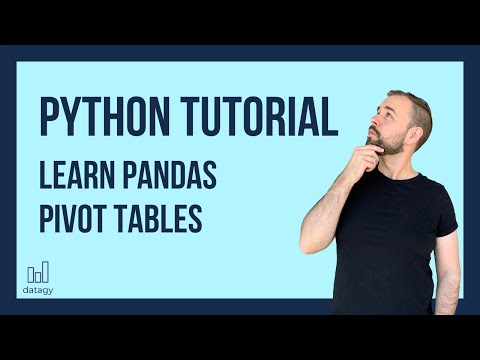

In [54]:
YouTubeVideo("5yFox2cReTw")

In [55]:
df = pd.read_excel('https://github.com/datagy/mediumdata/raw/master/sample_pivot.xlsx')
df

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306
1,2020-09-23,North,Children's Clothing,14.0,448
2,2020-04-02,South,Women's Clothing,17.0,425
3,2020-02-28,East,Children's Clothing,26.0,832
4,2020-03-19,West,Women's Clothing,3.0,33
...,...,...,...,...,...
995,2020-02-11,East,Children's Clothing,35.0,735
996,2020-12-25,North,Men's Clothing,NaN,1155
997,2020-08-31,South,Men's Clothing,13.0,208
998,2020-08-23,South,Women's Clothing,17.0,493


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [57]:
df.groupby('Region').Units.agg(np.sum)

Region
East     8110.0
North    4359.0
South    2798.0
West     2624.0
Name: Units, dtype: float64

In [58]:
pd.pivot_table(df, index='Region')

,Sales,Units
Region,,
East,408.182482,19.732360
North,438.924051,19.202643
South,432.956204,20.423358
West,452.029412,19.294118


In [59]:
pd.pivot_table(df, index='Region', aggfunc=np.sum)

,Sales,Units
Region,,
East,167763,8110.0
North,138700,4359.0
South,59315,2798.0
West,61476,2624.0


In [60]:
df[(df.Region == 'North') & (df.Type == "Men's Clothing")].Units.agg('count')

0

In [61]:
df.groupby('Region').agg({'Sales':np.sum, 'Units':np.mean}) 

,Sales,Units
Region,,
East,167763,19.732360
North,138700,19.202643
South,59315,20.423358
West,61476,19.294118


In [62]:
df.groupby(['Region','Type']).agg({'Sales':np.sum, 'Units':np.mean}) 

Sales      Units
Region Type                                 
East   Children's Clothing  45849  20.513274
       Men's Clothing       51685  19.836066
       Women's Clothing     70229  19.159091
North  Children's Clothing  37306  20.741176
       Men's Clothing       39975        NaN
       Women's Clothing     61419  18.281690
South  Children's Clothing  18570  22.600000
       Men's Clothing       18542  18.589744
       Women's Clothing     22203  19.924528
West   Children's Clothing  20182  18.785714
       Men's Clothing       19077  20.219512
       Women's Clothing     22217  18.981132

In [63]:
pd.pivot_table(df, index=['Region','Type'], aggfunc={"Sales":np.sum, "Units":np.mean})

Sales      Units
Region Type                                 
East   Children's Clothing  45849  20.513274
       Men's Clothing       51685  19.836066
       Women's Clothing     70229  19.159091
North  Children's Clothing  37306  20.741176
       Men's Clothing       39975        NaN
       Women's Clothing     61419  18.281690
South  Children's Clothing  18570  22.600000
       Men's Clothing       18542  18.589744
       Women's Clothing     22203  19.924528
West   Children's Clothing  20182  18.785714
       Men's Clothing       19077  20.219512
       Women's Clothing     22217  18.981132

In [64]:
pd.pivot_table(df, index=['Type','Region'], aggfunc={"Sales":np.sum, "Units":np.mean})

Sales      Units
Type                Region                  
Children's Clothing East    45849  20.513274
                    North   37306  20.741176
                    South   18570  22.600000
                    West    20182  18.785714
Men's Clothing      East    51685  19.836066
                    North   39975        NaN
                    South   18542  18.589744
                    West    19077  20.219512
Women's Clothing    East    70229  19.159091
                    North   61419  18.281690
                    South   22203  19.924528
                    West    22217  18.981132

Let's turn our attention to the Jake Vanderplas on-line tutorial on [Github](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)

In [65]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [67]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [68]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Looking ahead to data cleaning, one approach to the missing 177 ages would be to fill them in with random ages within one standard deviation of the mean, i.e. mean-sd to mean+sd where sd = standard deviation.

The function below takes a new column name as input, i.e. we will leave Age as is and have the "filled in" version elsewhere.

In [69]:
def fill_na_age(df, colname):
    mean = df[colname].mean()
    sd = df[colname].std()
    def fill_empty(x):
        if np.isnan(x):  # return untouched otherwise
            return np.random.randint(mean-sd, mean+sd, ())  # replace with likely value
        return x 
    return df[colname].apply(fill_empty).astype(float)

Thanks to: Revathi Suriyadeepan<br/>
[Exploratory Data Analysis of Titanic Survival Problem](https://medium.com/analytics-vidhya/exploratory-data-analysis-of-titanic-survival-problem-e3af0fb1f276)<br/>
Part I — Analysis, Cleaning & Visualization<br/>
Dec 30, 2020

In [70]:
titanic['filled_age'] = fill_na_age(titanic, 'age')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,filled_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,35.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.0


In [71]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [72]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [73]:
titanic.pivot_table(values='survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [74]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [75]:
fare = pd.qcut(titanic['fare'], 4)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 7.91]           (7.91, 14.454]            \
class                    First     Third         Second     Third   
sex    age                                                          
female (0, 18]             NaN  0.625000       1.000000  0.769231   
       (18, 80]            NaN  0.600000       0.880000  0.333333   
male   (0, 18]             NaN  0.000000       0.000000  0.461538   
       (18, 80]            0.0  0.103774       0.098039  0.157143   

fare            (14.454, 31.0]                     (31.0, 512.329]         \
class                    First    Second     Third           First Second   
sex    age                                                                  
female (0, 18]             NaN  1.000000  0.400000        0.909091   1.00   
       (18, 80]          0.875  0.900000  0.470588        0.984848   1.00   
male   (0, 18]             NaN  0.857143  0.266667        0.800000   0.75   
       (18, 80]          0.500  0.041667  0.095238        0.333333   0.00   

fare                       
class               Third  
sex    age                 
female (0, 18]   0.142857  
       (18, 80]  0.166667  
male   (0, 18]   0.076923  
       (18, 80]  0.600000

In [76]:
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [77]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [78]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [79]:
pd.DataFrame(births.groupby("year")["births"].agg("sum"))

,births
year,
1969,3600206
1970,3737800
1971,3563548
1972,3266235
1973,3146125
1974,3170631
1975,3153556
1976,3176476
1977,3332159


In [80]:
births.groupby("year")["births"].agg("sum").idxmax()

2007

In [81]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table(values="births", index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


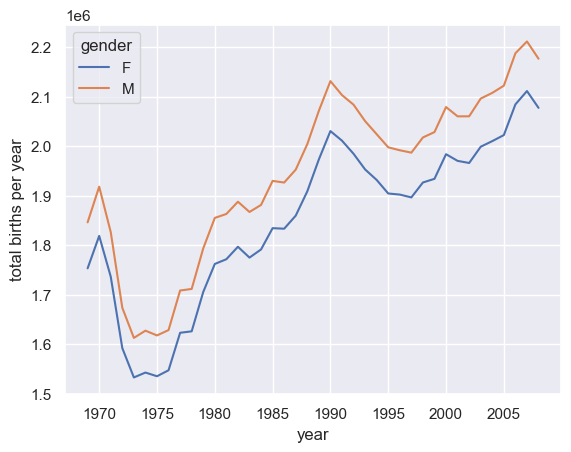

In [82]:
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');